In [2]:
%matplotlib notebook
import numpy.linalg as LA
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import uqra
import math
import itertools
import os
import scipy.stats as stats
import scipy.io
import scipy.special as sp_special
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import model_selection
import pickle
np.set_printoptions(precision=4)
import matplotlib as mpl
pltlinestyles= [ '--', '-.', ':']*10
pltmarkers   = ['o','v','s','d','+','*']
ordinal      = lambda n: "%d%s" % (n,"tsnrhtdd"[(math.floor(n/10)%10!=1)*(n%10<4)*n%10::4])
pltcolors    = plt.rcParams['axes.prop_cycle'].by_key()['color']

figsize      = (4*1.5,3*1.5)
pltlinewidth = 1.0
mpl.rcParams['font.size'] = 12
size=12
params = {'legend.fontsize': 10,
#           'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size,
          'ytick.labelsize': size,
          'axes.titlepad': size}
plt.rcParams.update(params)
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['lines.linewidth'] = 1

from statsmodels.distributions.empirical_distribution import ECDF


In [3]:
def draw_circle(r=1,origin=[0,0],n=1000):
    theta =np.linspace(0,2*np.pi,n)
    x = r*np.cos(theta) + origin[0]
    y = r*np.sin(theta) + origin[1]
    cood = np.array([x,y])
    return cood

def ball_volume(r,d):
    v = r**d * np.pi**(d/2.0)/sp_special.gamma(d/2.0+1)
    return v
# cood = draw_circle()
# print(cood.shape)
# fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,4))
# circle_u = draw_circle(r=2,origin=u50_EC)
# circle_x = uqra.environment.Kvitebjorn().ppf(stats.norm.cdf(circle_u))
# ax1.plot(circle_u[0], circle_u[1], 'r-.')
# ax2.plot(circle_x[0], circle_x[1], 'r-.')

def cal_ellipse_cord(center, radii, rotation, n=1000):
    ndim = center.size
    if ndim == 2:
        u = np.linspace(0.0, 2.0 * np.pi, n)
        x = radii[0] * np.cos(u)     
        y = radii[1] * np.sin(u)
        
        for i in range(len(x)):
            [x[i], y[i]] = np.dot([x[i], y[i]], rotation) + center
        return np.array([x,y])
        
    elif ndim ==3:
        assert ndim == len(radii)
        u = np.linspace(0.0, 2.0 * np.pi, n)
        v = np.linspace(0.0, np.pi, n)

        # cartesian coordinates that correspond to the spherical angles:
        x = radii[0] * np.outer(np.cos(u), np.sin(v))
        y = radii[1] * np.outer(np.sin(u), np.sin(v))
        z = radii[2] * np.outer(np.ones_like(u), np.cos(v))
        # rotate accordingly
        for i in range(len(x)):
            for j in range(len(x)):
                [x[i,j],y[i,j],z[i,j]] = np.dot([x[i,j],y[i,j],z[i,j]], rotation) + center
    
        return np.array([x,y,z])

def plotEllipsoid(self, center, radii, rotation, ax=None, plotAxes=False, cageColor='b', cageAlpha=0.2):
    """Plot an ellipsoid"""
    make_ax = ax == None
    if make_ax:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')


        
        
def cal_num_basis(d, p):
    r1 = math.factorial(d+p)
    r2 = math.factorial(d)
    r3 = math.factorial(p)
    r = int(r1/r2/r3)
    return r

class Data(): pass

def save_obj(obj, filename, data_dir=None):
    if data_dir is None:
        data_dir = os.getcwd()
    with open(os.path.join(data_dir, filename+'.pkl'), 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(filename, data_dir=None):
    if data_dir is None:
        data_dir = os.getcwd()
    with open(os.path.join(data_dir, filename+'.pkl'), 'rb') as f:
        return pickle.load(f)
def make_labels_attrs(sampling_method, optimality):
    labels = []
    attr_names = []
    for isampling in sampling_method:
        if isampling.lower()[:3] in ['cls', 'mcs']:
            for ioptimality in optimality:
                if ioptimality is None:
                    labels.append(isampling.upper())
                    attr_names.append(isampling.capitalize())
                else:
                    labels.append('-'.join([isampling.upper(), ioptimality.upper()]))
                    attr_names.append(''.join([isampling.capitalize(), ioptimality.upper()]))
        elif isampling.lower() == 'lhs':
            labels.append(isampling.upper())
            attr_names.append(isampling.capitalize())
        else:
            raise ValueError

    return labels, attr_names


## Testing: Experimental Design

<IPython.core.display.Javascript object>


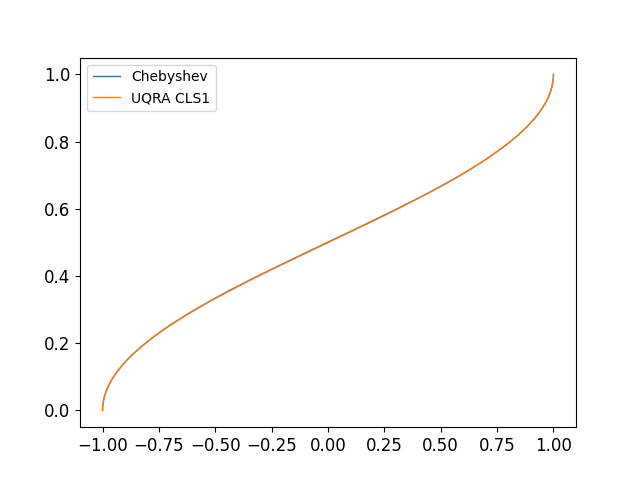

In [7]:
filename = 'DoE_CLS1E6D1.npy'
x0, x1 = np.load(os.path.join('Data', filename))
ecdf_x0 = ECDF(np.squeeze(x0))
ecdf_x1 = ECDF(np.squeeze(x1))

plt.figure()
plt.plot(ecdf_x0.x, ecdf_x0.y, label='Chebyshev')
plt.plot(ecdf_x1.x, ecdf_x1.y, label='UQRA CLS1')
plt.legend()

<IPython.core.display.Javascript object>


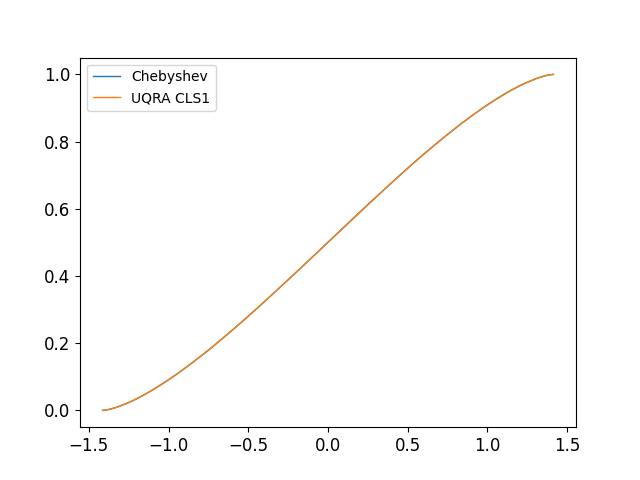

In [29]:
filename = 'DoE_CLS4E6D1.npy'
x0, x1 = np.load(os.path.join('Data', filename))
x0, x1 = np.squeeze(x0),np.squeeze(x1)
ecdf_x0 = ECDF(np.squeeze(x0))
ecdf_x1 = ECDF(np.squeeze(x1))

plt.figure()
plt.plot(ecdf_x0.x, ecdf_x0.y, label='Chebyshev')
plt.plot(ecdf_x1.x, ecdf_x1.y, label='UQRA CLS1')
plt.legend()
### 1d pdf check
x = np.linspace(-1.4,1.4, 1000)
fx = 1/np.pi * np.sqrt(2-x**2)
plt.figure()
plt.plot(x, fx, label='Theoretical')
plt.hist(x0, density=True,bins=1000, label='Rejection')
plt.hist(x1, density=True,bins=1000, label='UQRA CLS4')
plt.legend()


In [32]:
filename = 'DoE_CLS4E6D2.npy'
x0, x1 = np.load(os.path.join('Data', filename))
x0, x1 = np.squeeze(x0),np.squeeze(x1)
print(x0.shape, x1.shape)
ecdf_x0 = ECDF(np.squeeze(x0))
ecdf_x1 = ECDF(np.squeeze(x1))

plt.figure()
plt.plot(ecdf_x0.x, ecdf_x0.y, label='Chebyshev')
plt.plot(ecdf_x1.x, ecdf_x1.y, label='UQRA CLS1')
plt.legend()
### 1d pdf check
x = np.linspace(-1.4,1.4, 1000)
fx = 1/np.pi * np.sqrt(2-x**2)
plt.figure()
plt.plot(x, fx, label='Theoretical')
plt.hist(x0, density=True,bins=1000, label='Rejection')
plt.hist(x1, density=True,bins=1000, label='UQRA CLS4')
plt.legend()

(2, 1000000) (2, 1000000)


ValueError: x and y do not have the same shape